<a href="https://colab.research.google.com/github/CamilleGreen5/Deep_Learning_with_Python/blob/master/newswires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import tensorflow
import numpy as np
from tensorflow.keras.datasets import reuters
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [10]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000, )

word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])

coded_review = train_data[0]
decoded_review = ''.join(
    reverse_word_index.get(i - 3, '?') + ' ' for i in coded_review)

# print(decoded_review)

In [11]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results
  
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1
    return results

In [12]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [13]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

print('len x_train = ', len(partial_x_train))
print('len x_val = ', len(x_val))

len x_train =  7982
len x_val =  1000


In [15]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 0s 22ms/step - loss: 2.6991 - accuracy: 0.5155 - val_loss: 1.7171 - val_accuracy: 0.6420
Epoch 2/20
16/16 [==============================] - 0s 13ms/step - loss: 1.3917 - accuracy: 0.7149 - val_loss: 1.2798 - val_accuracy: 0.7280
Epoch 3/20
16/16 [==============================] - 0s 13ms/step - loss: 1.0183 - accuracy: 0.7884 - val_loss: 1.1125 - val_accuracy: 0.7780
Epoch 4/20
16/16 [==============================] - 0s 14ms/step - loss: 0.7937 - accuracy: 0.8379 - val_loss: 1.0215 - val_accuracy: 0.8020
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 0.6299 - accuracy: 0.8711 - val_loss: 0.9599 - val_accuracy: 0.8050
Epoch 6/20
16/16 [==============================] - 0s 14ms/step - loss: 0.5012 - accuracy: 0.8976 - val_loss: 0.9317 - val_accuracy: 0.8050
Epoch 7/20
16/16 [==============================] - 0s 13ms/step - loss: 0.4043 - accuracy: 0.9168 - val_loss: 0.9207 - val_accuracy: 0.8110
Epoch 8/20
16

In [16]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

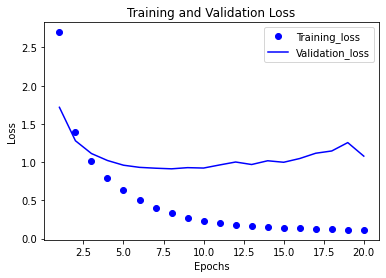

In [17]:
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, 'bo', label='Training_loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [20]:
history_dict = history.history
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

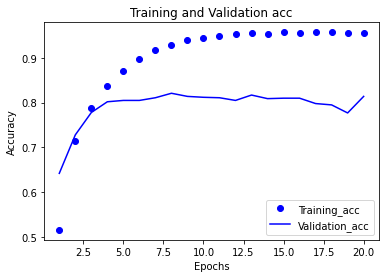

In [21]:
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, acc_values, 'bo', label='Training_acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation_acc')
plt.title('Training and Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [22]:
results = model.evaluate(x_test, one_hot_test_labels)

71/71 [==============================] - 0s 2ms/step - loss: 1.1715 - accuracy: 0.7898
